## Initial steps

- Importing the data from csv

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, BisectingKMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

FILENAME = "Question 1 data.csv"

df = pd.read_csv(FILENAME)

df.head()

,X,Y
0,664159,550946
1,665845,557965
2,597173,575538
3,618600,551446
4,635690,608046


- Data description

In [2]:
df.describe()

,X,Y
count,5000.000000,5000.000000
mean,514937.556600,494709.292800
std,244465.901926,235840.852969
min,19835.000000,51121.000000
25%,320352.500000,320107.750000
50%,505338.500000,526259.500000
75%,786228.750000,713713.500000
max,961951.000000,970756.000000


- Scatter plot

[]

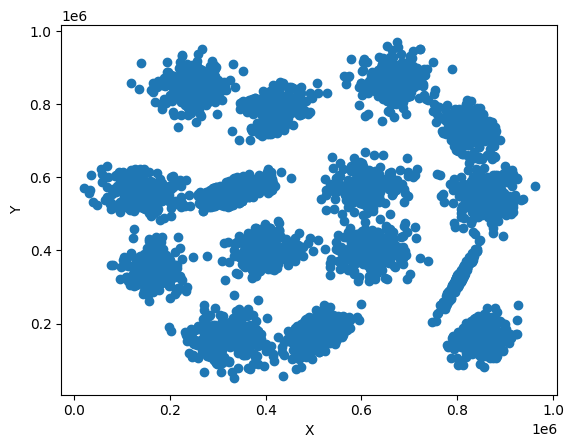

In [4]:
x = df["X"]
y = df["Y"]

plt.scatter(x,y)
plt.xlabel("X")
plt.ylabel("Y")
plt.plot()


## Clustering

### K-mean Clustering

- Random values for K

In [ ]:

import time

x = df["X"].values
y = df["Y"].values
data = np.column_stack((x, y))

# --- Compute Total Sum of Squares (TSS) ---
global_mean = np.mean(data, axis=0)
TSS = np.sum((data - global_mean) ** 2)

# --- K-means Clustering ---
# List of different k values to test and number of runs for each k
k_values = range(1,20)
n_runs = 3

results = {}

for k in k_values:
    results[k] = []
    print(f"\nK = {k}")
    for run in range(n_runs):
        start_time = time.time()
        
        # Initialize KMeans with random initialization; n_init=1 forces a single random start per run.
        kmeans = KMeans(n_clusters=k, init='random', n_init=1, random_state=None)
        kmeans.fit(data)
        
        elapsed_time = time.time() - start_time
        iterations = kmeans.n_iter_
        wcss = kmeans.inertia_  # Within-cluster sum of squared errors
        
        # Calculate Between-cluster sum of squares (BCSS)
        bcss = TSS - wcss
        
        # Save the run's results
        run_result = {
            'run': run + 1,
            'iterations': iterations,
            'WCSS': wcss,
            'BCSS': bcss,
            'time': elapsed_time
        }
        results[k].append(run_result)
        
        print(f"Run {run+1}: Iterations = {iterations}, WCSS = {wcss:.2f}, BCSS = {bcss:.2f}, Time = {elapsed_time:.4f} seconds")



K = 1
Run 1: Iterations = 2, WCSS = 576807041183705.75, BCSS = -0.50, Time = 0.0377 seconds
Run 2: Iterations = 2, WCSS = 576807041183705.75, BCSS = -0.50, Time = 0.0101 seconds
Run 3: Iterations = 2, WCSS = 576807041183705.75, BCSS = -0.50, Time = 0.0038 seconds

K = 2
Run 1: Iterations = 3, WCSS = 373234909162487.75, BCSS = 203572132021217.50, Time = 0.0038 seconds
Run 2: Iterations = 4, WCSS = 371486471899980.75, BCSS = 205320569283724.50, Time = 0.0048 seconds
Run 3: Iterations = 5, WCSS = 343183591393337.25, BCSS = 233623449790368.00, Time = 0.0043 seconds

K = 3
Run 1: Iterations = 6, WCSS = 221425056380514.22, BCSS = 355381984803191.00, Time = 0.0040 seconds
Run 2: Iterations = 9, WCSS = 221425327027060.53, BCSS = 355381714156644.75, Time = 0.0043 seconds
Run 3: Iterations = 8, WCSS = 213509053896740.09, BCSS = 363297987286965.12, Time = 0.0074 seconds

K = 4
Run 1: Iterations = 5, WCSS = 138250712993153.72, BCSS = 438556328190551.50, Time = 0.0061 seconds
Run 2: Iterations = 9

- Using Elbow method to find best K

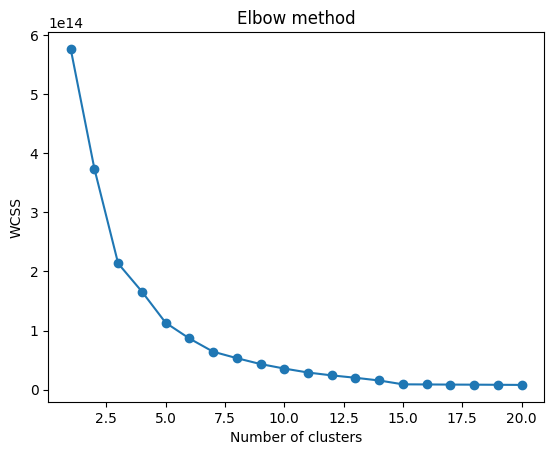

In [13]:
inertias = []
for i in range(1,21):
    k_means = KMeans(n_clusters=i)
    k_means.fit(data)
    inertias.append(k_means.inertia_)

plt.plot(range(1,21), inertias, marker="o")
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show() 

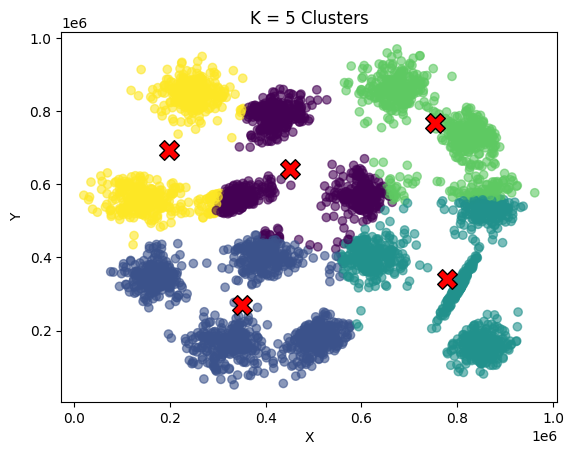

In [16]:
# --- K=5 ---
kmeans_5 = KMeans(n_clusters=5, random_state=42)
labels_5 = kmeans_5.fit_predict(data)

plt.scatter(x, y, c=labels_5, cmap='viridis', alpha=0.6)
plt.scatter(kmeans_5.cluster_centers_[:, 0],
            kmeans_5.cluster_centers_[:, 1],
            s=200, c='red', marker='X', edgecolors='black')
plt.title("K = 5 Clusters")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()


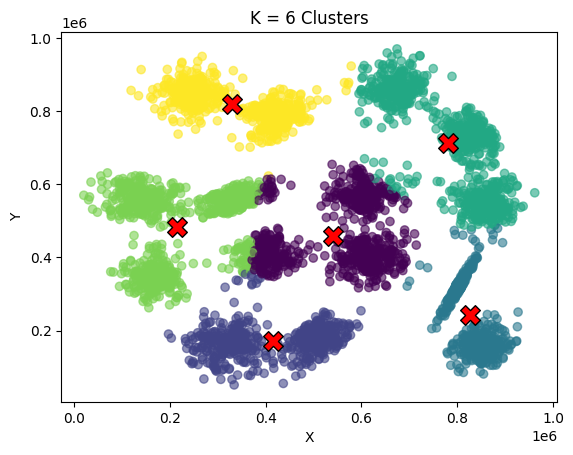

In [15]:

# --- K=6 ---
kmeans_6 = KMeans(n_clusters=6, random_state=42)
labels_6 = kmeans_6.fit_predict(data)

plt.scatter(x, y, c=labels_6, cmap='viridis', alpha=0.6)
plt.scatter(kmeans_6.cluster_centers_[:, 0],
            kmeans_6.cluster_centers_[:, 1],
            s=200, c='red', marker='X', edgecolors='black')
plt.title("K = 6 Clusters")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [30]:
def compute_sse(data, labels):
    """Compute the sum of squared errors (SSE) for given cluster labels."""
    unique_labels = np.unique(labels)
    sse = 0.0
    for lbl in unique_labels:
        cluster_points = data[labels == lbl]
        if len(cluster_points) > 0:
            centroid = np.mean(cluster_points, axis=0)
            sse += np.sum((cluster_points - centroid) ** 2)
    return sse


### Bisecting K-means

Bisecting Kmeans SSE: 119195327756062.91, Time: 0.0342s


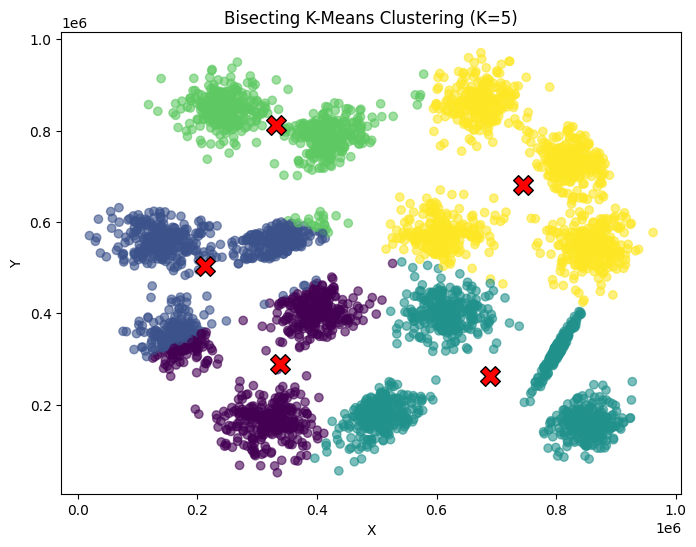

In [34]:
K = 5
start_time = time.time()
bisecting_kmeans = BisectingKMeans(n_clusters=K, random_state=42)
bisecting_kmeans.fit(data)

labels = bisecting_kmeans.fit_predict(data)
elapsed_time = time.time() - start_time

sse = compute_sse(data, labels)
print(f"Bisecting Kmeans SSE: {sse:.2f}, Time: {elapsed_time:.4f}s")

# Plotting the clusters
plt.figure(figsize=(8, 6))
plt.scatter(data[:, 0], data[:, 1], c=bisecting_kmeans.labels_, cmap='viridis', alpha=0.6)
plt.scatter(bisecting_kmeans.cluster_centers_[:, 0], bisecting_kmeans.cluster_centers_[:, 1],
            s=200, c='red', marker='X', edgecolors='black')
plt.title("Bisecting K-Means Clustering (K=5)")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

### Hierarchical Clustering

Hierarchical (single) SSE: 337402586248183.19, Time: 0.2268s


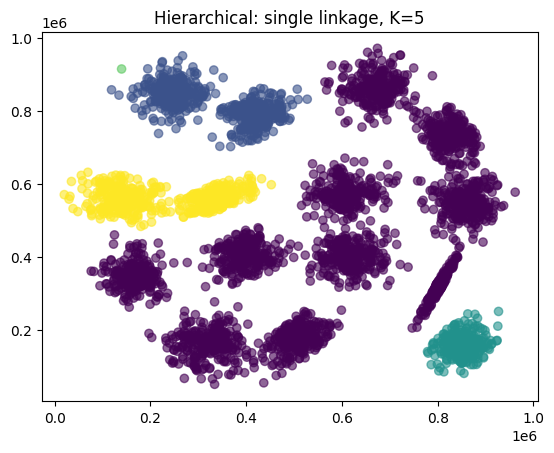

Hierarchical (complete) SSE: 105493297014477.89, Time: 1.0050s


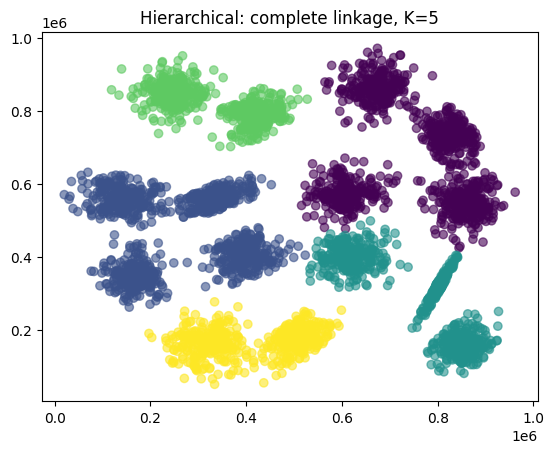

Hierarchical (average) SSE: 115521884541555.23, Time: 0.7796s


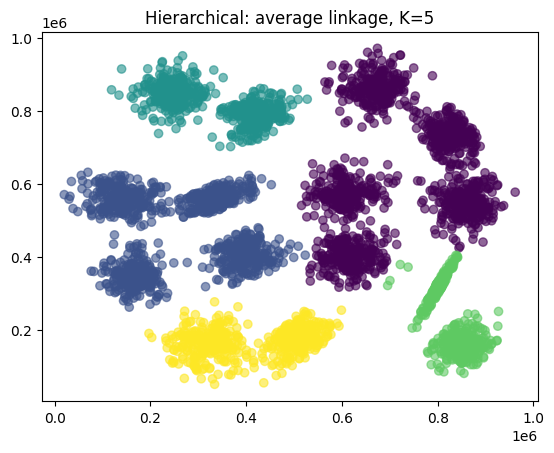

In [31]:
linkage_methods = ['single', 'complete', 'average']
K = 5

for link in linkage_methods:
    start_time = time.time()
    hc = AgglomerativeClustering(n_clusters=K, linkage=link)
    labels_hc = hc.fit_predict(data)
    elapsed_time = time.time() - start_time
    
    sse_hc = compute_sse(data, labels_hc)
    print(f"Hierarchical ({link}) SSE: {sse_hc:.2f}, Time: {elapsed_time:.4f}s")
    
    plt.scatter(data[:,0], data[:,1], c=labels_hc, cmap='viridis', alpha=0.6)
    plt.title(f"Hierarchical: {link} linkage, K={K}")
    plt.show()


###  DBSCAN

DBSCAN SSE: nan, Time: 0.0387s


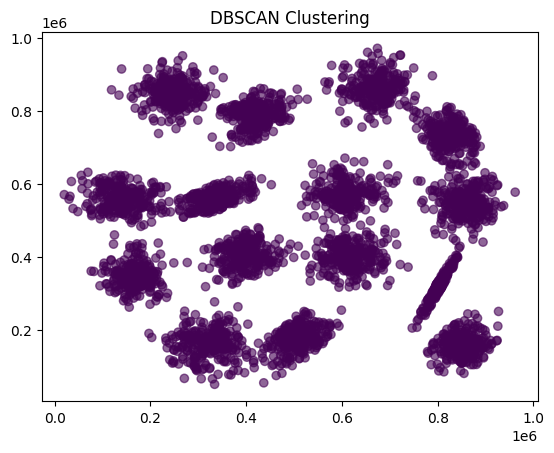

In [29]:
start_time = time.time()
dbscan = DBSCAN(eps=12.0, min_samples=20)  
labels_db = dbscan.fit_predict(data)
elapsed_time = time.time() - start_time

mask = (labels_db != -1)
sse_db = compute_sse(data[mask], labels_db[mask]) if np.any(mask) else np.nan

print(f"DBSCAN SSE: {sse_db:.2f}, Time: {elapsed_time:.4f}s")

plt.scatter(data[:,0], data[:,1], c=labels_db, cmap='viridis', alpha=0.6)
plt.title("DBSCAN Clustering")
plt.show()
